El siguiente trabajo tiene como finalidad hacer una exploración predictiva en base al subsidio de vivienda mi casas ya en Valledupar, Cesar. La pregunta que se está buscando explorar es la cantidad de subsidios que disponibles para sortear en la vivienda VIS en el municipio de Valledupar.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from statistics import mean
import matplotlib as mpl

Primero se analizan las varibles para entender lo que hay en las 4 tablas obtenidas de datos abiertos:
Las tablas son:
1. sis: Asignación de sisben según vivienda
2. mil: Asignación de subsidios vivienda militar y policia
3. mac: Asignación de subsidios a los macroproyectos.
4. suv: asignación de subsidios de vivienda

La tabla suv y sis son las más importantes, por lo cual se detallan también con describe()

**Análisis descriptivo:**

In [ ]:
#@title Carga la mayoría de tablas
sis = pd.read_csv('/content/drive/MyDrive/ASESOR VIRTUAL/MICASAYA/DNP_-_Sisb_n_Vivienda.csv')
mil = pd.read_csv('/content/drive/MyDrive/ASESOR VIRTUAL/MICASAYA/Subsidios_de_Vivienda_de_la_Caja_Promotora_de_Vivienda_Militar_y_de_Polic_a.csv')
mac = pd.read_csv('/content/drive/MyDrive/ASESOR VIRTUAL/MICASAYA/Viviendas_Construidas_En_Macroproyectos.csv')
suv = pd.read_csv('/content/drive/MyDrive/ASESOR VIRTUAL/MICASAYA/Subsidios_De_Vivienda_Asignados.csv')
#print('-------------------------- Sisben Sub Vivienda --------------------------')
#print(sis.head(3))
#print(sis.dtypes)
#print('-------------------------- Sub de vivenda asignados --------------------------')
#print(suv.head(3))
#print(suv.dtypes)
#print('-------------------------- Mil y Pol --------------------------')
#print(mil.dtypes)
#print('-------------------------- Macroproyectos --------------------------')
#print(mac.dtypes)

Ahora buscamos entender las categorias de las variables: No es necesario mostrarlas.

In [ ]:
#@title Categorias. (No relevante en la discusión)
print('-------------------------- Sisben Sub Vivienda --------------------------')
print(sis.nunique())
print('-------------------------- Sub de vivenda asignados --------------------------')
print(suv.nunique())
print('-------------------------- Mil y Pol --------------------------')
print(mil.nunique())
print('-------------------------- Macroproyectos --------------------------')
print(mac.nunique())

-------------------------- Sisben Sub Vivienda --------------------------
cod_mpio    1099
ZONA           2
llave       3401
CORTE          1
FEX         2179
VIV001         5
VIV002         7
VIV003         6
VIV004         2
VIV005         2
VIV006         2
VIV007         2
VIV008         2
VIV009        15
VIV010        12
dtype: int64
-------------------------- Sub de vivenda asignados --------------------------
Departamento                       33
Código Divipola Departamento       33
Municipio                         979
Código Divipola Municipio         560
Programa                           25
Año de Asignación                  21
Estado de Postulación              29
Hogares                           523
Valor Asignado                  11866
dtype: int64
-------------------------- Mil y Pol --------------------------
Año                2
Trimestre          4
Departamento      34
Nueva- VIS        32
Nueva- No VIS     17
Usada - VIS      151
Usada- No VIS     34
dtype: int64


**MI CASA YA EN EL CESAR Y VALLEDUPAR**
Rápidamente la información más rápida se puede sacar de la tabla suv. Se responderán las siguentes preguntas:
1. Que porcentajes de subsidios MI CASA YA asignados le tocó a valledupar por año?
2. Que porcentajes de subsidios MI CASA YA asignados le tocó al Cesar por año?
3. Que proporción de los subsidios del Cesar se fueron a Valledupar?

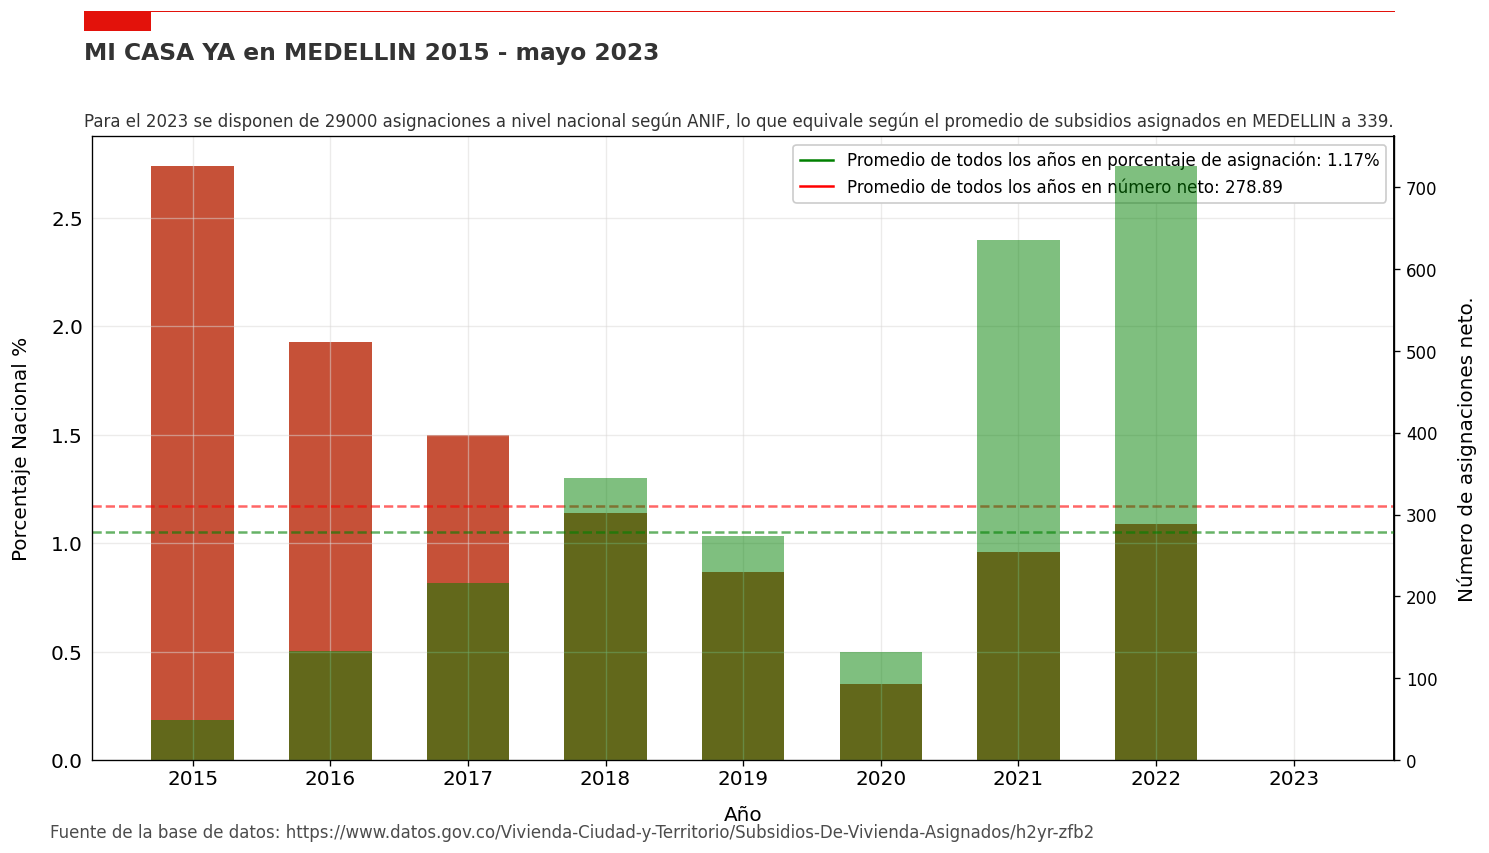

In [ ]:
#@title MI CASA YA: Departamento.
departamento = "medellin" #@param {type:"string"}
departamento = departamento.upper()
mcy = suv.query("Programa == 'MI CASA YA'")
mcy = mcy.loc[mcy['Estado de Postulación'] == 'Asignados']
pais_total = mcy.groupby(by='Año de Asignación')['Hogares'].sum()
valledupar_total = mcy.query("Municipio == '{}'".format(departamento)).groupby(by='Año de Asignación')['Hogares'].sum()
valledupar_total.loc[2023] = 0

# from raw value to percentage
neto_vall = valledupar_total.to_list()
porcentaje_vall = pd.Series([(valledupar_total[i] / pais_total[i]) * 100 for i in valledupar_total.index.to_list()])
years = valledupar_total.index.to_list()

mea = round(mean(porcentaje_vall), 2)
mea1 = round(mean(neto_vall), 2)

estim = int(29000 * (mea / 100))

# show the graph
labels = years

# Plot bars
fig, ax = plt.subplots(figsize=(14,8), dpi = 120)
ax2 = ax.twinx()
bar1 = ax.bar(years, porcentaje_vall, width=0.6, color='#C65138')
bar2 = ax2.bar(years, neto_vall, width=0.6, color='green', alpha=0.5)
ax.set_xticks(labels)
ax.set_xticklabels(labels)

# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('Año', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)


# Reformat y-axis
ax.set_ylabel('Porcentaje Nacional %', fontsize=12, labelpad=12)
ax2.set_ylabel('Número de asignaciones neto.', fontsize=12, labelpad=12)

ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.1f}')
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)


# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s="MI CASA YA en {} 2015 - mayo 2023".format(departamento), transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Para el 2023 se disponen de 29000 asignaciones a nivel nacional según ANIF, lo que equivale según el promedio de subsidios asignados en {} a {}."
.format(departamento, estim, departamento), transform=fig.transFigure, ha='left', fontsize=10, alpha=.8)

# Set source text
ax.text(x=0.1, y=0.12, s="Fuente de la base de datos: https://www.datos.gov.co/Vivienda-Ciudad-y-Territorio/Subsidios-De-Vivienda-Asignados/h2yr-zfb2", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85
, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

#add horizontal line at mean value of y and first quartile
ax.axhline(y=mea, alpha=0.6, color='r', linestyle='--')
ax2.axhline(y=mea1, alpha=0.6, color='g', linestyle='--')

# legend
# create a dictionary of labels and lines
lines = {'Promedio de todos los años en porcentaje de asignación: {}%'.format(mea): plt.Line2D([], [], color='g'),
         'Promedio de todos los años en número neto: {}'.format(mea1): plt.Line2D([], [], color='r')}

# add the legend
legend = ax.legend(lines.values(), lines.keys(), loc=0)
legend.get_frame().set_alpha(1)
legend.get_frame().set_facecolor('white')


# show the plot
plt.show()

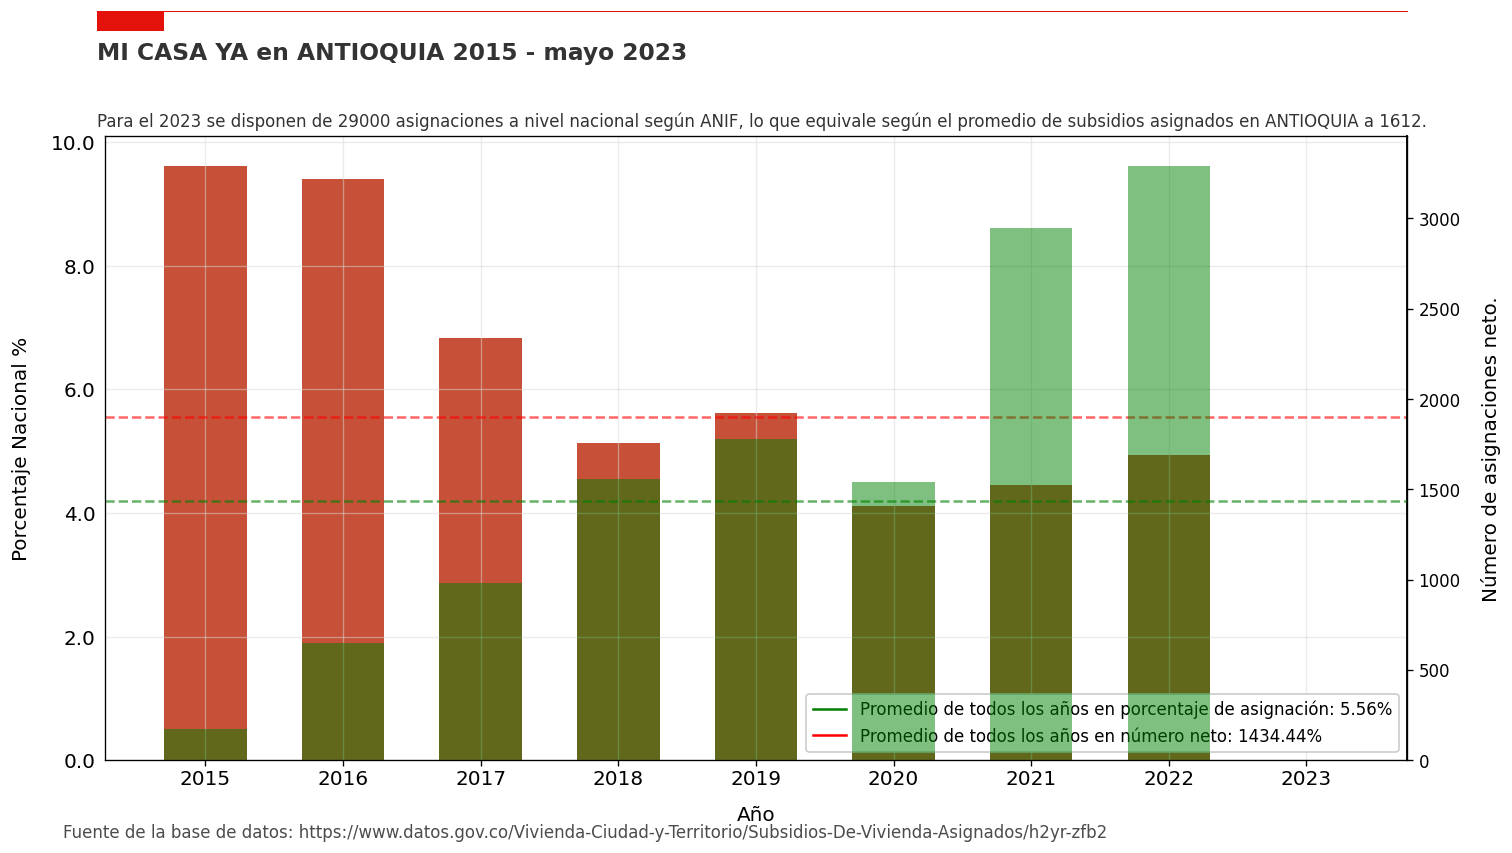

In [ ]:
#@title MI CASA YA: Departamento.
departamento = "antioquia" #@param {type:"string"}
departamento = departamento.upper()
mcy = suv.query("Programa == 'MI CASA YA'")
mcy = mcy.loc[mcy['Estado de Postulación'] == 'Asignados']
pais_total = mcy.groupby(by='Año de Asignación')['Hogares'].sum()
valledupar_total = mcy.query("Departamento == '{}'".format(departamento)).groupby(by='Año de Asignación')['Hogares'].sum()
valledupar_total.loc[2023] = 0

# from raw value to percentage
neto_vall = valledupar_total.to_list()
porcentaje_vall = pd.Series([(valledupar_total[i] / pais_total[i]) * 100 for i in valledupar_total.index.to_list()])
years = valledupar_total.index.to_list()

mea = round(mean(porcentaje_vall), 2)
mea1 = round(mean(neto_vall), 2)

estim = int(29000 * (mea / 100))

# show the graph
labels = years

# Plot bars
fig, ax = plt.subplots(figsize=(14,8), dpi = 120)
ax2 = ax.twinx()
bar1 = ax.bar(years, porcentaje_vall, width=0.6, color='#C65138')
bar2 = ax2.bar(years, neto_vall, width=0.6, color='green', alpha=0.5)
ax.set_xticks(labels)
ax.set_xticklabels(labels)

# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('Año', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)


# Reformat y-axis
ax.set_ylabel('Porcentaje Nacional %', fontsize=12, labelpad=12)
ax2.set_ylabel('Número de asignaciones neto.', fontsize=12, labelpad=12)

ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.1f}')
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)


# Remove the spines
ax.spines[['top','left','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s="MI CASA YA en {} 2015 - mayo 2023".format(departamento), transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=.86, s="Para el 2023 se disponen de 29000 asignaciones a nivel nacional según ANIF, lo que equivale según el promedio de subsidios asignados en {} a {}."
.format(departamento, estim, departamento), transform=fig.transFigure, ha='left', fontsize=10, alpha=.8)

# Set source text
ax.text(x=0.1, y=0.12, s="Fuente de la base de datos: https://www.datos.gov.co/Vivienda-Ciudad-y-Territorio/Subsidios-De-Vivienda-Asignados/h2yr-zfb2", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85
, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

#add horizontal line at mean value of y and first quartile
ax.axhline(y=mea, alpha=0.6, color='r', linestyle='--')
ax2.axhline(y=mea1, alpha=0.6, color='g', linestyle='--')

# legend
# create a dictionary of labels and lines
lines = {'Promedio de todos los años en porcentaje de asignación: {}%'.format(mea): plt.Line2D([], [], color='g'),
         'Promedio de todos los años en número neto: {}%'.format(mea1): plt.Line2D([], [], color='r')}

# add the legend
legend = ax.legend(lines.values(), lines.keys(), loc=4)
legend.get_frame().set_alpha(1)
legend.get_frame().set_facecolor('white')


# show the plot
plt.show()

**PRESUPUESTO Y ALCANCE MI CASA YA**

Cómo fue el crecimiento de los subsidiso durante el transcurso de MI CASA YA?

El número de viviendas alcanzadas muestra que el programa incrementó durante varios años de forma progresiva, existe un caso especial donde entre el 2021 y 2022 el número de viviendas se mantuvo constante.

El presupuesto invertido escala con el número de viviendas alcanzadas como es de esperar, al analizar el periodo 2021 - 2022 se puede observar que el presupuesto necesito 0.2 billones de pesos para poder mantener el mismo número de viviendas.

Esto se puede observar en la última tabla donde la capacidad del peso en subsidiar el valor de las viviendas va decreciendo desde 9% de la vivienda por millón gastado a tan solo un 4% de la vivienda por millón invertido.

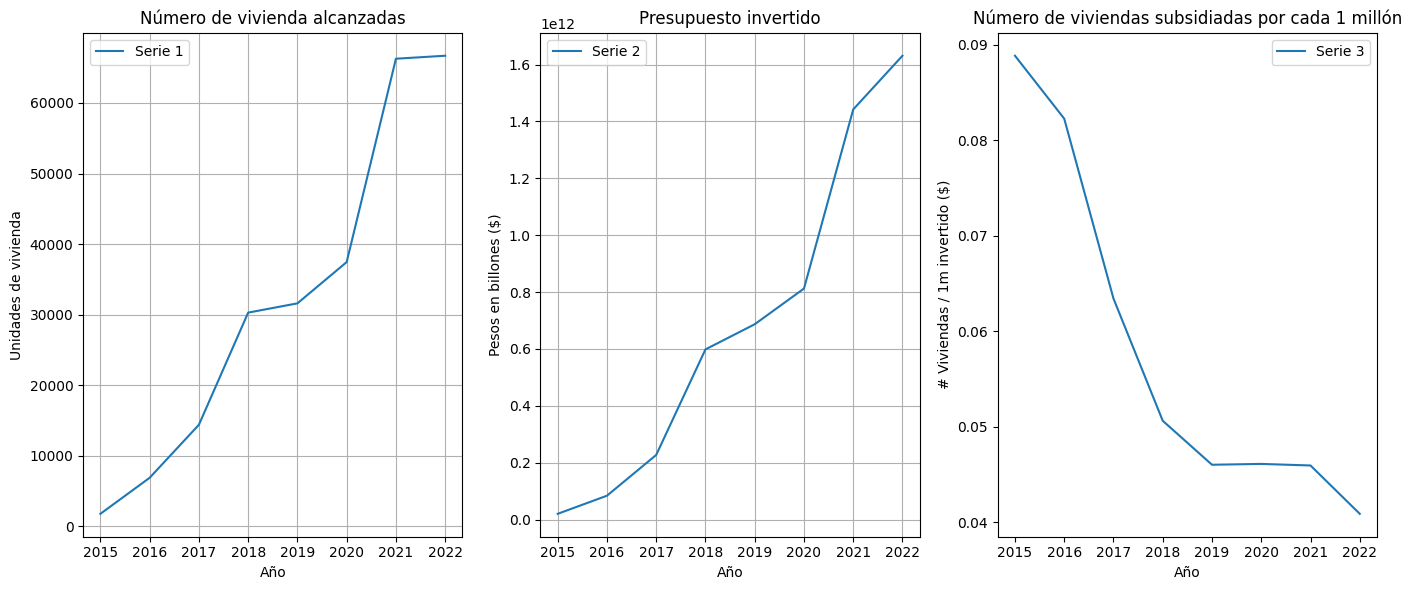

In [79]:
#@title Analisis de presupuesto MI CASA YA y viviendas alcanzadas.
pais_total = mcy.groupby(by='Año de Asignación')['Hogares'].sum().iloc[:-1]
dinero_total = mcy.groupby(by='Año de Asignación')['Valor Asignado'].sum().iloc[:-1]
alcance_pres = [pais_total[i]/dinero_total[i] * 1000000 for i in pais_total.index]


# Salario minimo
sal_min = {2015: 644350, 2016: 689454, 2017: 737717, 2018: 781242, 2019: 828116, 2020: 877803, 2021: 908526, 2022: 1000000}
sal_min = pd.DataFrame.from_dict(sal_min, orient='index')
# creas un dataframe con las dos series
df = pd.DataFrame({'Serie 1': pais_total, 'Serie 2': dinero_total, 'Serie 3': alcance_pres})

# graficas las dos series en un mismo gráfico de líneas
fig, axs = plt.subplots(ncols=3, figsize=(14, 6))
df.plot(y='Serie 1', ax=axs[0])
df.plot(y='Serie 2', ax=axs[1])
df.plot(y='Serie 3', ax=axs[2])

# personalizas el gráfico
axs[0].set_title('Número de vivienda alcanzadas')
axs[1].set_title('Presupuesto invertido')
axs[2].set_title('Número de viviendas subsidiadas por cada 1 millón')
axs[0].set_xlabel('Año')
axs[1].set_xlabel('Año')
axs[2].set_xlabel('Año')
axs[0].set_ylabel('Unidades de vivienda')
axs[1].set_ylabel('Pesos en billones ($)')
axs[2].set_ylabel('# Viviendas / 1m invertido ($)')

plt.tight_layout()
plt.grid()
axs[0].grid()
axs[1].grid()
axs[2].grid()

plt.show()


 
**OFERTA VENTA:**
Es importante analizar como se mueve la oferta y la venta en el Cesar, para ello se hizo un gráfico de correlación lineal. Un gráfico idealizado sería que se compraran tantos como se ofertan, eso haría que las lineas de las gráficas tuviesen una inclinación de 45 grados, cada punto está hecho a partir de un mes en ese año, eso quiere decir que todas las lineas están ajustadas de 12 puntos excepto 2015 y 2023 que tienen un menor número.

 El comportamiento de las lineas en la gráfica no es cercano a los 45 siempre la oferta está superando la venta (como es de esperar).
  Las sombras de las gráficas son que tanto se desvia la tendencia del valor central, una sombra ancha significa que los valores cambian oscilan mucho para ese año con respecto a la media de ese año.

La comparación entre las dos gráficas nos muestra que en el Cesar:
1. La vivienda VIP tiene menor oferta pocas veces superando las 100 unidades.
2. La vivienda VIS tiene bastante oferta comparada con la VIP, superando las 200 unidades en casi todos los casos.
3. Existe un aglomerado grande de puntos en todos los años que están entre los 100 - 200 de ventas (eje Y) y los 400 y 800 de ofertas. Lo cual quiere decir que la proporción de oferta y venta está más o menos en proporción 1:4 (se ofertan 4 casas por cada una que se compra)
4. Las viviendas VIP tienen un pequeño aglomerado en distintivo en oferta 0 y ventas de 0 a 100, lo cúal sería extraño si no se tiene cuidado de que la oferta son las nuevas viviendas en unidades que son lanzadas en ese mes, no es un total de la cantidad disponible. Así que parece haber una pequeña tendencia en las viviendas VIP en los años 2017, 2018 y 2019 en venderse y ofertarse en una tasa muy similiar ( 1 casa ofertada por 1 casa vendida), estos años se mantuvieron así. Rusultaria interesante investigar si existió un proyecto VIP que duró estos años y que fuese tal vez de casas asignadas, para explicar la poca fluctiación de oferta/venta para estos años.

<Figure size 2400x1200 with 0 Axes>

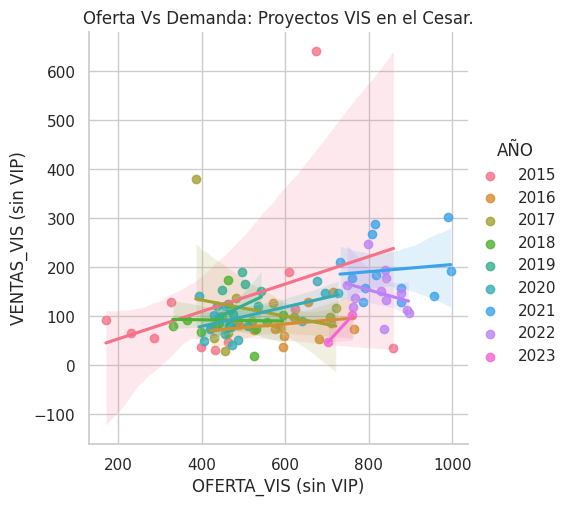

In [80]:
#@title OFERTA VS VENTA: PROYECTOS VIS
from google.colab import auth
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
import pandas as pd

#defining my worksheet
worksheet = gc.open('cesar_camacol_2022').sheet1

#get_all_values gives a list of rows
rows = worksheet.get_all_values()

#Convert to a DataFrame 
df = pd.DataFrame(rows)

#creating columns name
df.columns = df.iloc[0]
df = df.iloc[1:]

# Convertir la fecha en un formato doble de año/mes:
df['MES'] = df['Fecha'].apply(lambda x: x.split('-', 1)[0])
df['AÑO'] = df['Fecha'].apply(lambda x: '20' + x.split('0', 1)[1]).astype('int')

# Quedarme con solo los datos del 2015 - 2022
df_bckp = df
df = df.loc[df['AÑO'] >= 2015]


# Utilizar la OFERTA_VIS, VENTA_VIS y LOS SUBS asignados por año:
# Tanto la oferta, la venta y los subsidios son unitarios, es decir que son por vivienda, no es necesario normalizar.
gofven = df.loc[:, ['AÑO', 'OFERTA_VIS (sin VIP)', 'VENTAS_VIS (sin VIP)', 'OFERTA_VIP', 'VENTAS_VIP']]

for i in gofven.columns.to_list()[1:]:
    gofven[i] = gofven[i].astype('int')

gofven.set_index('AÑO')

# set seaborn style
sns.set_theme(style="whitegrid", palette="CMRmap")
plt.figure(figsize=(24, 12))

# Data
x = gofven['AÑO']
y = [gofven['OFERTA_VIS (sin VIP)'], gofven['VENTAS_VIS (sin VIP)'], gofven['OFERTA_VIP'], gofven['VENTAS_VIP']]
 
# Plot
sns.lmplot(data=gofven, x="OFERTA_VIS (sin VIP)", y="VENTAS_VIS (sin VIP)", hue='AÑO')
plt.title('Oferta Vs Demanda: Proyectos VIS en el Cesar.')
plt.show()

<Figure size 2400x1200 with 0 Axes>

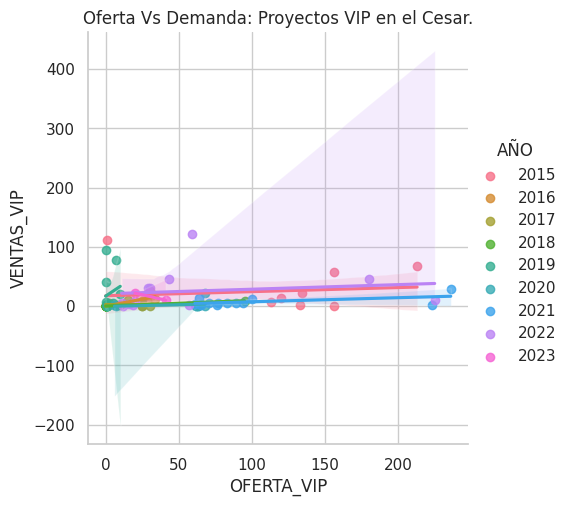

In [ ]:
#@title OFERTA VS DEMANDA: PROYECTOS VIP EN EL CESAR.
# set seaborn style
sns.set_theme(style="whitegrid", palette="CMRmap")
plt.figure(figsize=(24, 12))

# Data
x = gofven['AÑO']
y = [gofven['OFERTA_VIS (sin VIP)'], gofven['VENTAS_VIS (sin VIP)'], gofven['OFERTA_VIP'], gofven['VENTAS_VIP']]
 
# Plot
sns.lmplot(data=gofven, x="OFERTA_VIP", y="VENTAS_VIP", hue='AÑO')
plt.title('Oferta Vs Demanda: Proyectos VIP en el Cesar.')
plt.show()

Se muestra la correlación de Pearson para la oferta, venta y subsidios desde el 2015. Resulta interesante la alta correlación que tiene los subsidios asignados a clientes con las ventas de casas VIS pero no con la venta de casas VIP. Aunque es demasiado preliminar para hablar de una posible causalidad y no es lo que se está buscando, resultaría interesante la posibilidad de que en el Cesar las viviendas VIP se estén vendiendo sin tener subsidios de vivienda.

<ipython-input-82-96d9ac71b7cf>:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ant.corr(), dtype=np.bool))


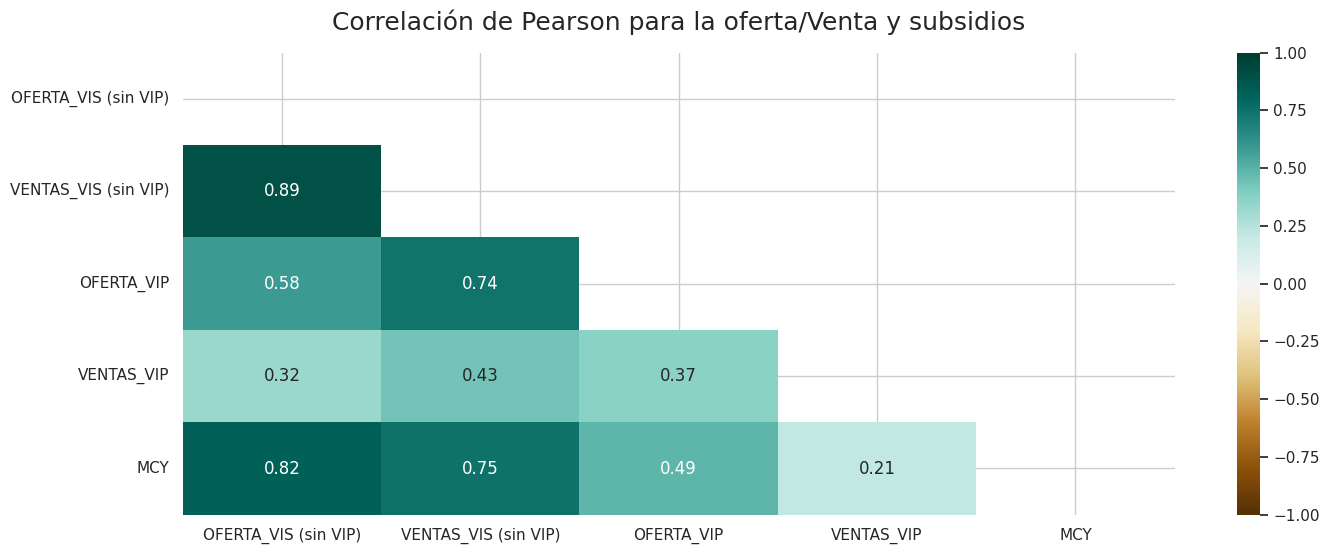

In [82]:
#@title Análisis de correlación:
an_ofven = gofven.groupby('AÑO').sum()
#an_ofven['VEN_div_OF_VIS'] = an_ofven['VENTAS_VIS (sin VIP)'] / an_ofven['OFERTA_VIS (sin VIP)'] 
#an_ofven['VEN_div_OF_VIP'] =  an_ofven['VENTAS_VIP'] / an_ofven['OFERTA_VIP'] 

# Agregar la cantidad de subsidios por año en el Cesar:
departamento = "cesar"
departamento = departamento.upper()
mcy_c = suv.query("Programa == 'MI CASA YA'")
mcy_c = mcy.loc[mcy['Estado de Postulación'] == 'Asignados']
cesar_total_sub = mcy_c.query("Departamento == '{}'".format(departamento)).groupby(by='Año de Asignación')['Hogares'].sum()
cesar_total_sub.loc[2023] = 0

ant = pd.concat([an_ofven, cesar_total_sub], axis=1)
ant.rename(columns = {'Hogares':'MCY'}, inplace = True)

# Como se relacionan las variables?
np.triu(np.ones_like(ant.corr()))
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(ant.corr(), dtype=np.bool))
heatmap = sns.heatmap(ant.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación de Pearson para la oferta/Venta y subsidios', fontdict={'fontsize':18}, pad=16);
plt.show()

Se grafica la Oferta/Venta para el Cesar desde el 2015, como es de esperarse la oferta siempre está superando ampliamente las ventas. Aunque es posible ver un pico bastante fuerte que decae en el 2023 y un fuerte pico de subida post Covid 2019. La cantidad de ventas VIS como se esperabada es cercana a ser nada más un cuarto de la oferta para VIS. También se puede hablar del patrón VIP desde el 2016 hasta el 2019, donde la proporción oferta/venta es 1:1, y un pequeño salto en 2019 donde la venta supera a la oferta.

Resulta también interesante de esta gráfica el margen que existe entre ventas VIP y subsidios asignados, donde se ve que hay un margén de por lo menos 500 unidades de subsidios, asumiendo que todos los proyectos VIP tengan un subsidio. Vemos un máximo en los años 2020 a 2022, donde aumenta hasta los 1000 unidades de subsidiso sobre las viviendas VIP. 

Otro factor interesante es ver que una gran proporción de viviendas VIS son vendidas sin subsidios de vivienda, se ve como hay un margen intereante de vivienda VIS vendida sin subsidio de vivienda. **La proporción promedio de vivienda VIS vendida sin subsidio frente a la vendida con subsidio es de 1 vivienda con subsidio vendida por cada 1.8 vivienda VIS vendida sin subsidio.**



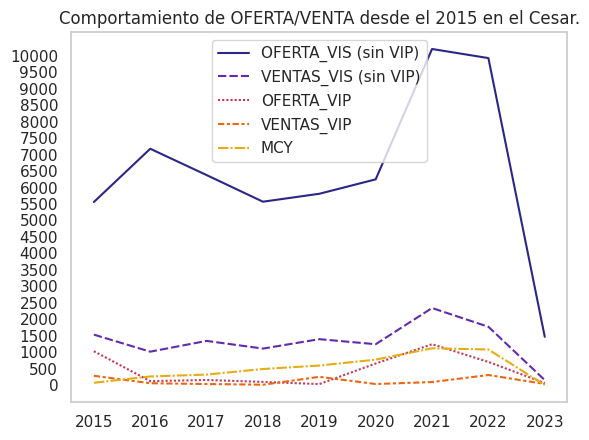

In [83]:
# Preguntas:


fig, ax = plt.subplots(1, 1)

ax = sns.lineplot(data=ant)
sns.set(style="ticks")

plt.title('Comportamiento de OFERTA/VENTA desde el 2015 en el Cesar.')
plt.rcParams['figure.figsize'] = [16, 8]

plt.yticks(range(0, 10500, 500))

plt.grid()
plt.show()

**Las ventas VIP en promedio OSCILAN las 119 y tienen una desviación estandar de 120** Analizemos ahora el margen de diferencia que existe entre los proyectos VIP comprados y los subsidios garantizados.

El promedio es que se tienen por lo menos 400 subsidios para las viviendas del Cesar, las cuales se estima son un 97 para Valledupar según las estadisticas de los últimos 8 años.
---



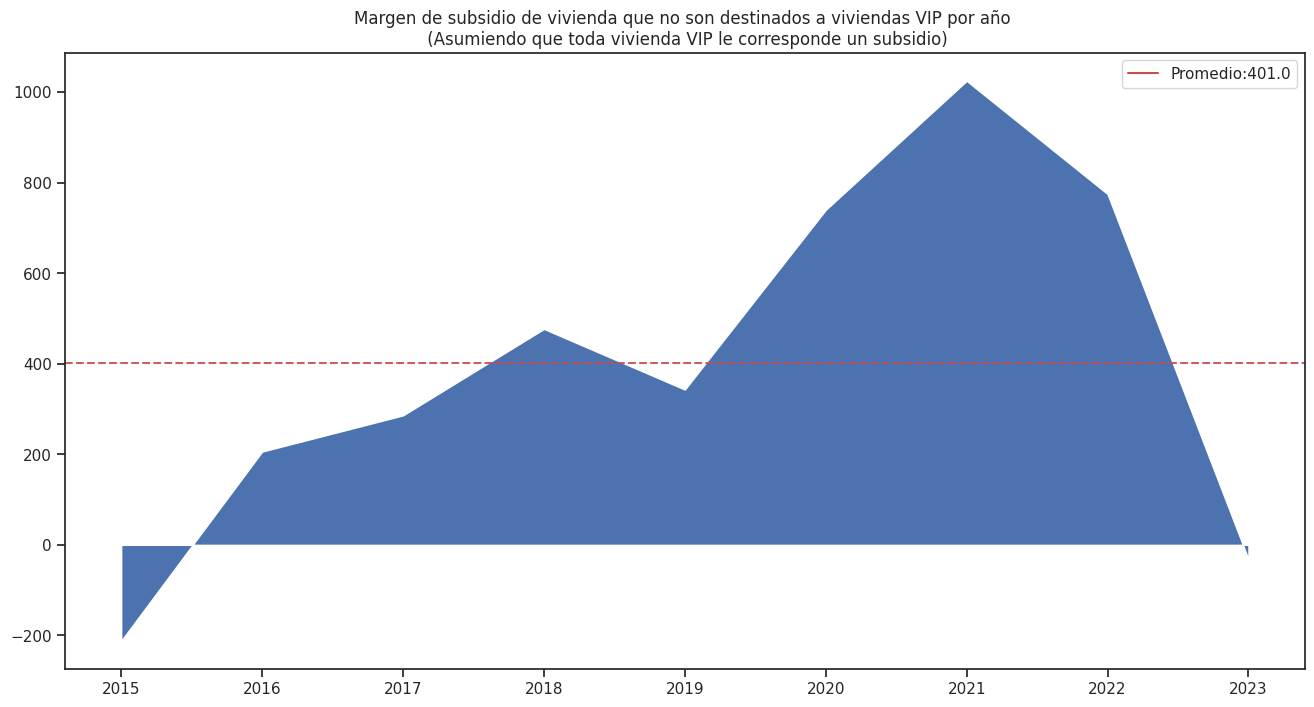

In [ ]:
# Data
x = ant.index.to_list() 
y= [ant['MCY'] - ant['VENTAS_VIP']]
mea = mean(ant['MCY'] - ant['VENTAS_VIP'])

# Plot
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.axhline(mea, alpha=0.9, color='r', linestyle='--')
lines = {'Promedio:{}'.format(round(mea, 0)): plt.Line2D([], [], color='r')}

# add the legend
plt.title('Margen de subsidio de vivienda que no son destinados a viviendas VIP por año \n (Asumiendo que toda vivienda VIP le corresponde un subsidio)')
plt.legend(lines.values(), lines.keys())
plt.show()

In [ ]:
ant['Casas_VIS_vendidas_sin_subsidio'] = ant['VENTAS_VIS (sin VIP)'] - ant['MCY']
ant['Casas_VIS_vendidas_con_subsidio'] = ant['MCY'] - ant['VENTAS_VIP']
ant['Casas_VIS_vendidas_con_subsidio'] = ant['Casas_VIS_vendidas_con_subsidio'].apply(lambda x: 0 if x < 0 else x)
print(ant)
print(ant.describe())

      OFERTA_VIS (sin VIP)  VENTAS_VIS (sin VIP)  OFERTA_VIP  VENTAS_VIP  \
2015                  5556                  1530        1026         280   
2016                  7174                  1012         117          54   
2017                  6375                  1339         152          30   
2018                  5566                  1106          95           9   
2019                  5807                  1392          28         248   
2020                  6245                  1239         652          30   
2021                 10203                  2338        1239          90   
2022                  9927                  1768         701         303   
2023                  1463                   149          61          32   

       MCY  Casas_VIS_vendidas_sin_subsidio  Casas_VIS_vendidas_con_subsidio  
2015    68                             1462                                0  
2016   260                              752                              206  
20